In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris=pd.read_excel('iris.xls')

In [ ]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [ ]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
for i in['SL', 'SW', 'PL' ]:
  iris[i]=iris[i].fillna(iris[i].median())

In [ ]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**scatter** **plot**

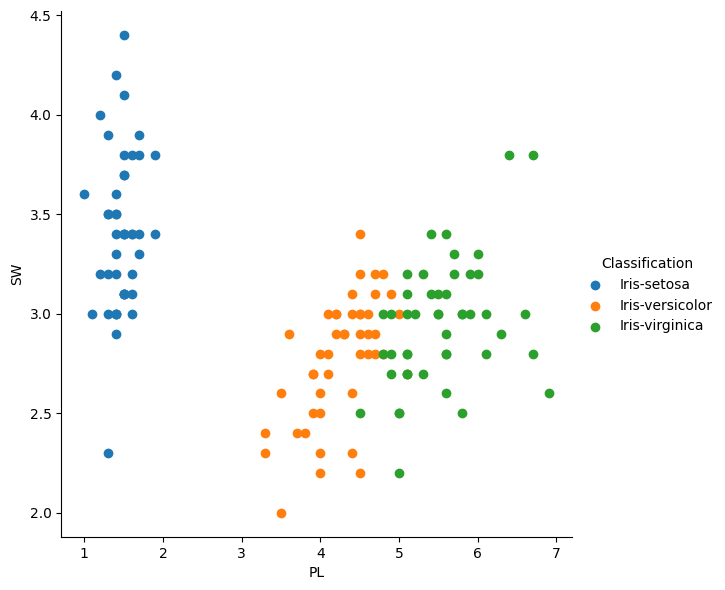

In [ ]:
sns.FacetGrid(iris,hue='Classification',height=6).map(plt.scatter,'PL','SW').add_legend()

out layer detection

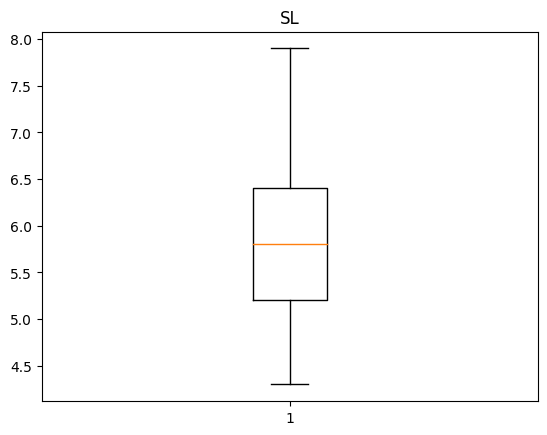

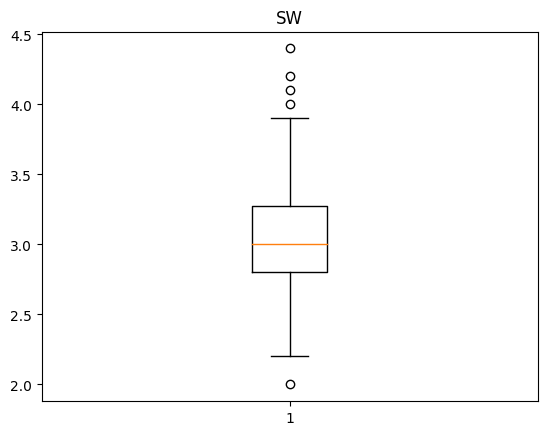

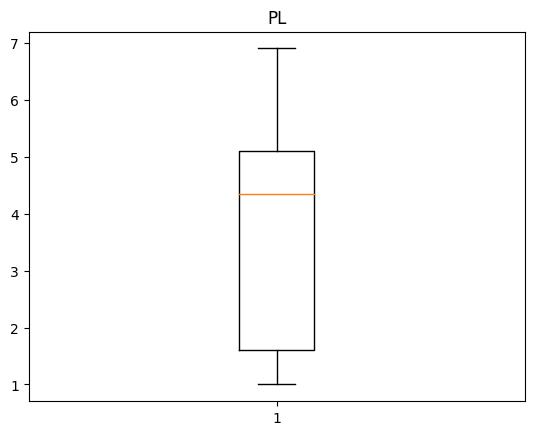

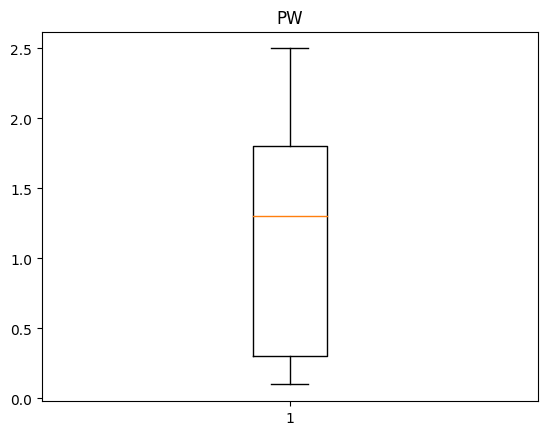

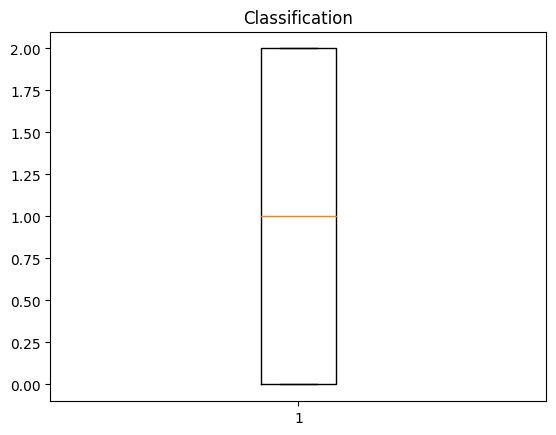

In [17]:
for i in ['SL', 'SW', 'PL', 'PW', 'Classification']:
  plt.figure()
  plt.boxplot(iris[i])
  plt.title(i)


In [18]:
q1= np.percentile(iris['SW'],25, method= 'midpoint')
q2= np.percentile(iris['SW'],50, method= 'midpoint')
q3= np.percentile(iris['SW'],75, method= 'midpoint')

In [19]:
print('q1 = ',q1)
print('q2 = ',q2)
print('q3 = ',q3)

q1 =  2.8
q2 =  3.0
q3 =  3.25


In [20]:
iris['SW'].median()

3.0

In [21]:
IQR=q3-q1

In [22]:
low_lim=q1-1.5*IQR
upper_lim=q3+1.5*IQR

In [24]:
outlier= []
for x in iris['SW']:
  if((x > upper_lim)or(x <low_lim)):
    outlier.append(x)


In [25]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [27]:
ind1= iris['SW'] < low_lim
iris.loc[ind1].index

Int64Index([60], dtype='int64')

In [28]:
iris.drop([60],inplace=True)

In [29]:
ind1= iris['SW'] > upper_lim
iris.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [31]:
iris.drop([14,15,32,33],inplace=True)

In [33]:
iris.head(14)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


SL                   Axes(0.125,0.712609;0.352273x0.167391)
SW                Axes(0.547727,0.712609;0.352273x0.167391)
PL                   Axes(0.125,0.511739;0.352273x0.167391)
PW                Axes(0.547727,0.511739;0.352273x0.167391)
Classification        Axes(0.125,0.31087;0.352273x0.167391)
dtype: object

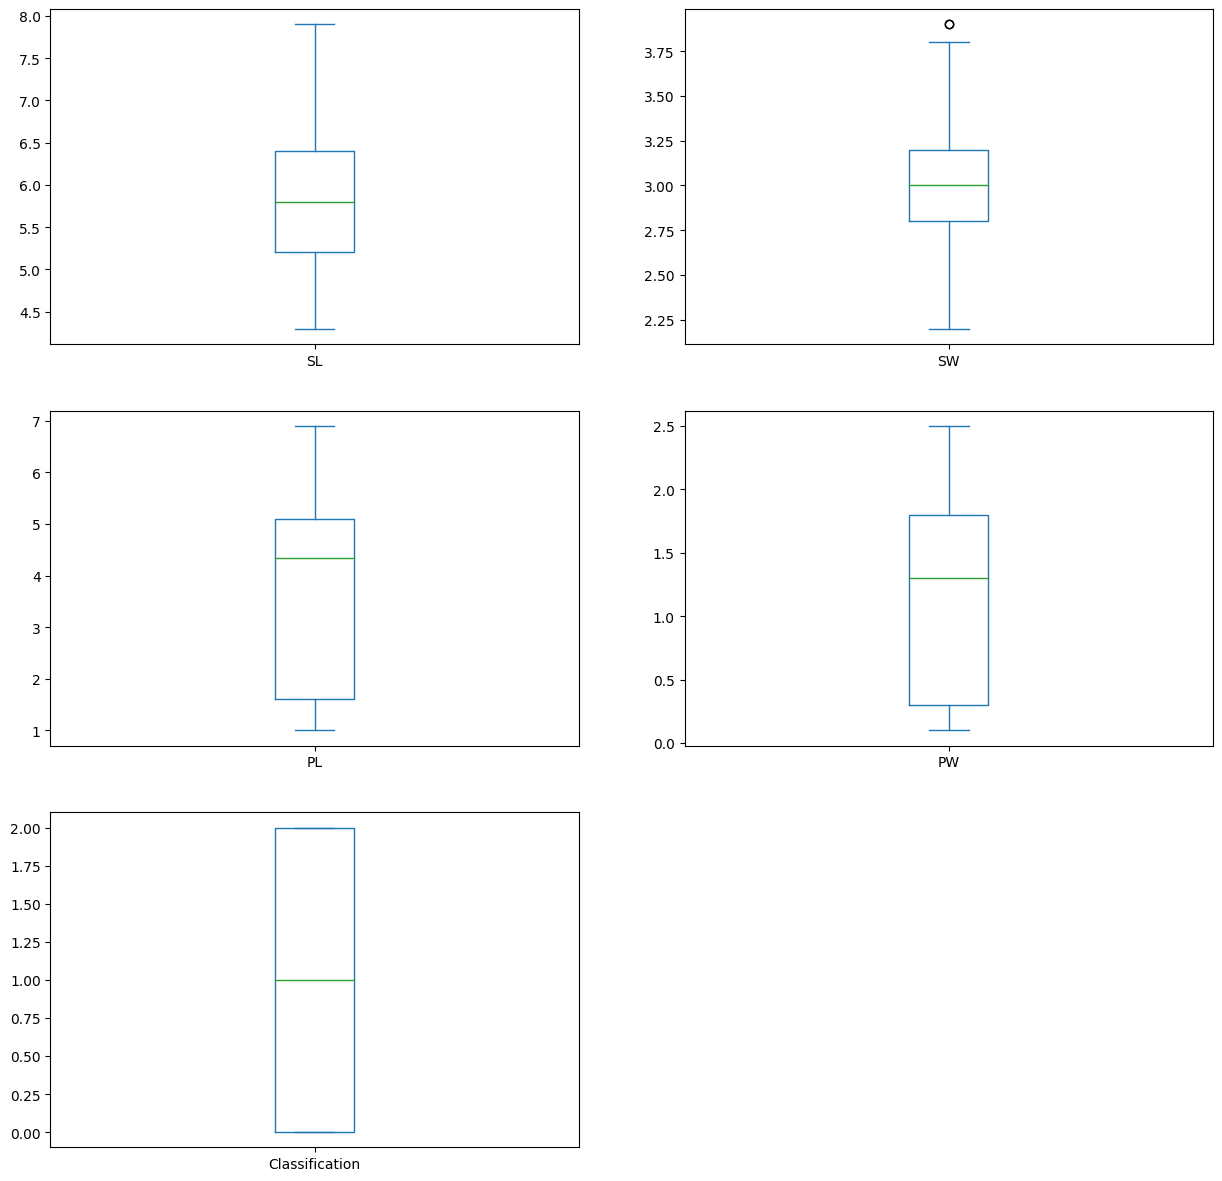

In [36]:
#checking wehther there is an outlier exist
iris.plot(kind='box',subplots=True,layout=(4,2),figsize=(15,20))

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#in this dataset nonnumerical datas are converted to numerical using labelencoder

In [ ]:
le=LabelEncoder()
iris['Classification']=le.fit_transform(iris['Classification'])

In [ ]:
iris['Classification']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

In [ ]:
#Find out which classification model give the best result

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
y=iris['Classification']
X=iris.drop(['Classification'],axis =1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Create instances of classifiers
classifiers = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results[name] = score

# Print the results
for name, score in results.items():
    print(f"{name}: {score}")


SVM: 0.9459459459459459
Decision Tree: 0.918918918918919
Random Forest: 0.918918918918919
Logistic Regression: 0.9459459459459459
K-Nearest Neighbors: 0.918918918918919
Naive Bayes: 0.9459459459459459
